In [1]:
#matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

#在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

#提示：引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可读性和美观度。即使你不使用seaborn API，你可能也会引入seaborn，作为提高美观度和绘制常见matplotlib图形的简化方法。

# 线型图

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图

In [4]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
#.cumsum()轴向累加和

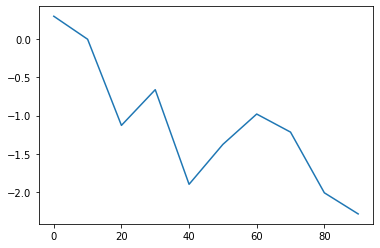

In [5]:
s.plot()

In [6]:
#该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。

In [7]:
#pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。

In [8]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                columns=['A', 'B', 'C', 'D'],
              index=np.arange(0, 100, 10))
#np.cumsum(axis=0)，按行累加

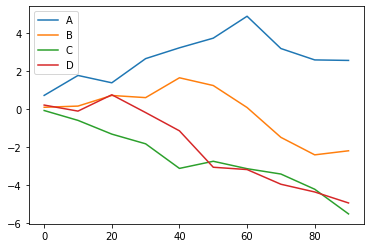

In [9]:
df.plot()

In [10]:
#plot属性包含一批不同绘图类型的方法。例如，df.plot()等价于df.plot.line()

# 柱状图

In [11]:
#plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


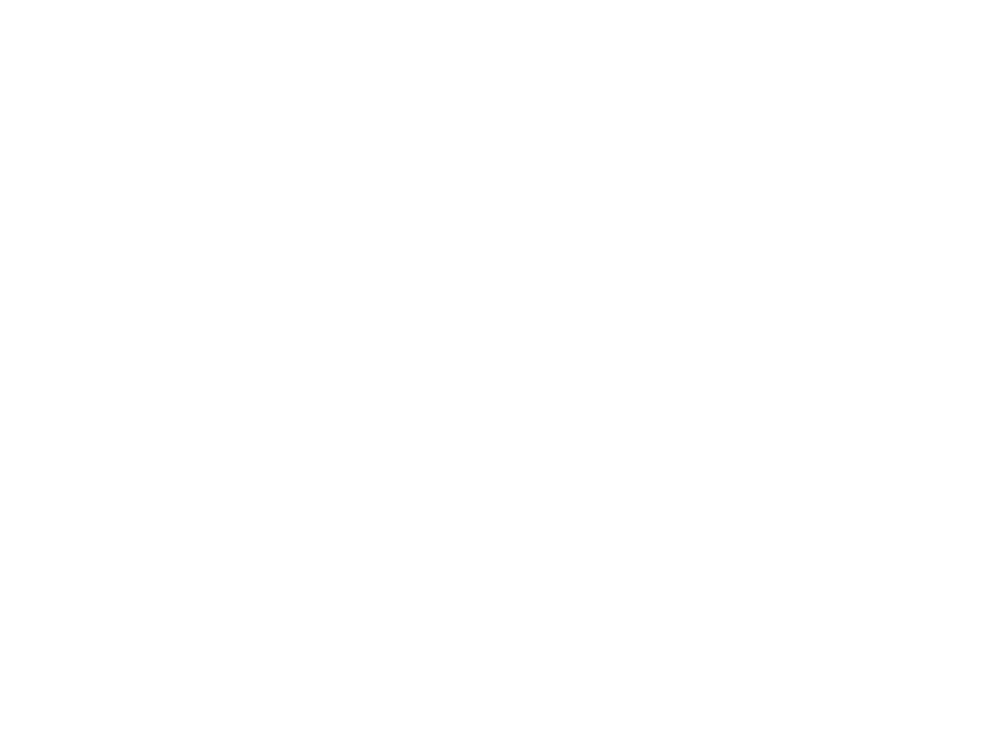

In [13]:
fig, axes = plt.subplots(2, 1)

In [14]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [15]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [16]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [17]:
#color='k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度。对于DataFrame，柱状图会将每一行的值分为一组，并排显示，

In [18]:
plt.close('all')

In [19]:
df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [20]:
df
#index为轴

Genus,A,B,C,D
one,0.258020,0.199865,0.468944,0.230939
two,0.120001,0.719426,0.186431,0.022626
three,0.410877,0.307766,0.424743,0.545746
four,0.758263,0.493152,0.328903,0.262870
five,0.353342,0.045124,0.488310,0.411105
six,0.141899,0.524950,0.203561,0.427942


<IPython.core.display.Javascript object>


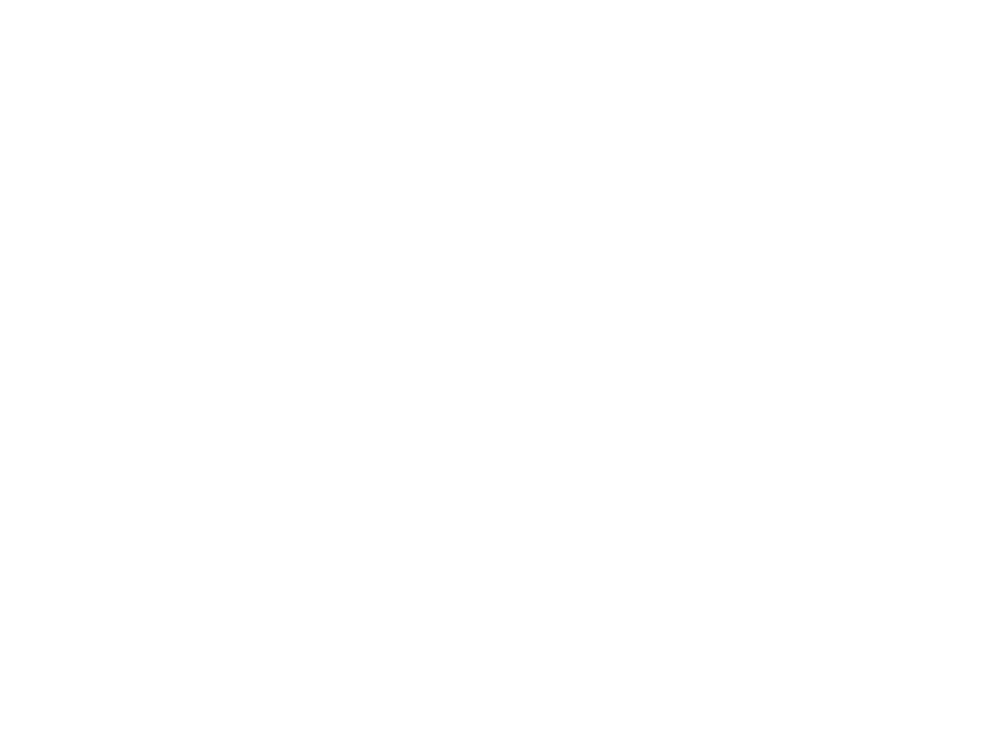

In [21]:
df.plot.bar()

<IPython.core.display.Javascript object>


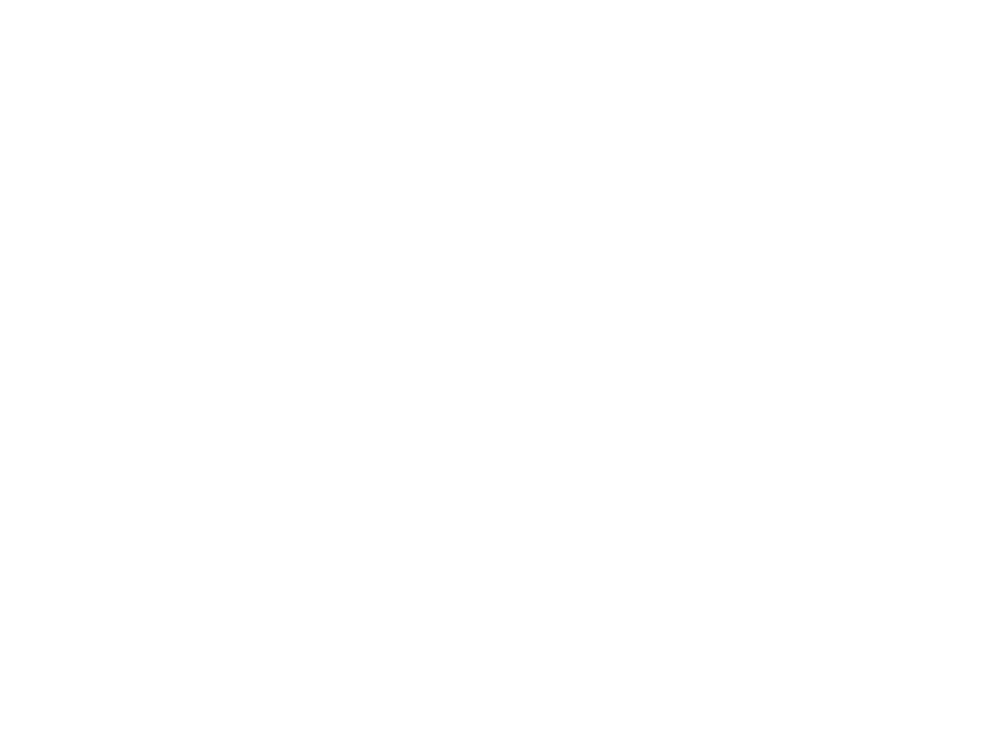

In [22]:
df.plot.barh()

In [23]:
#注意，DataFrame各列的名称"Genus"被用作了图例的标题。


<IPython.core.display.Javascript object>


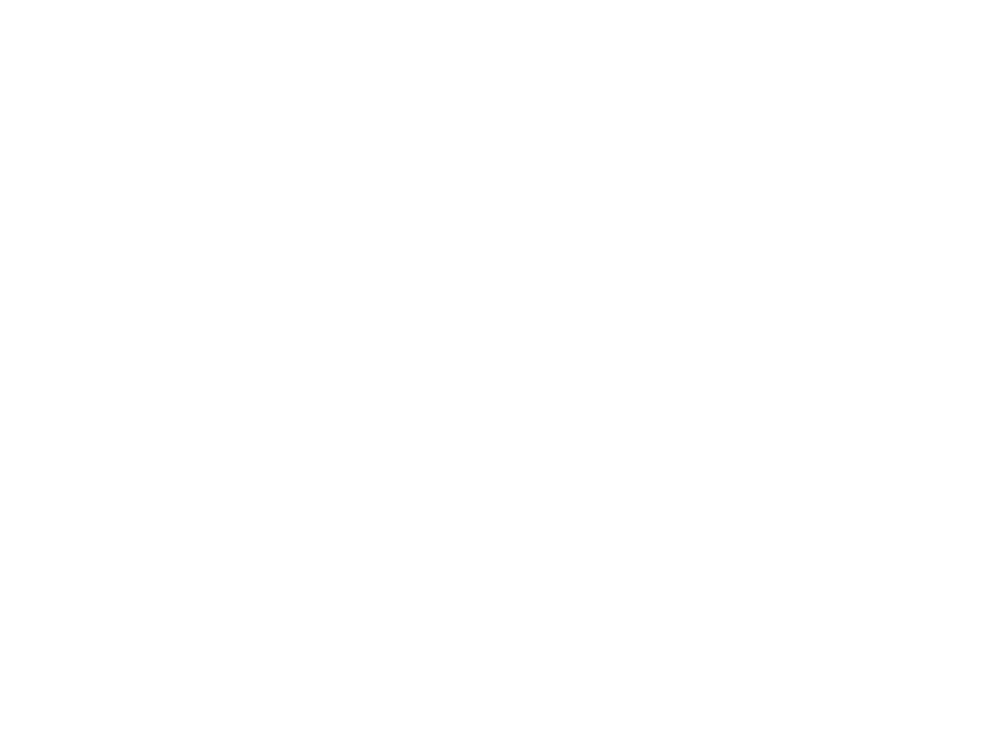

In [24]:
df.plot.barh(stacked=True, alpha=0.5)
#设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起

In [25]:
#再以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。我用read_csv将数据加载进来，然后根据日期和聚会规模创建一张交叉表：

In [26]:
tips = pd.read_csv('examples/tips.csv')

In [27]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [28]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [29]:
party_counts = party_counts.loc[:, 2:5]
#loc()函数是包括第五列的，前面的表示选择全行

In [30]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [31]:
#然后进行规格化，使得各行的和为1，并生成图表
party_pcts = party_counts.div(party_counts.sum(1), axis=0)#.sum(1)表示求每一行的和
party_pcts
#sum(-1)和sum(1)数组每一行的和，等价于 sum(axis=1) 
#sum(0)求数组每一列的和，等价于sum(axis=0) 

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


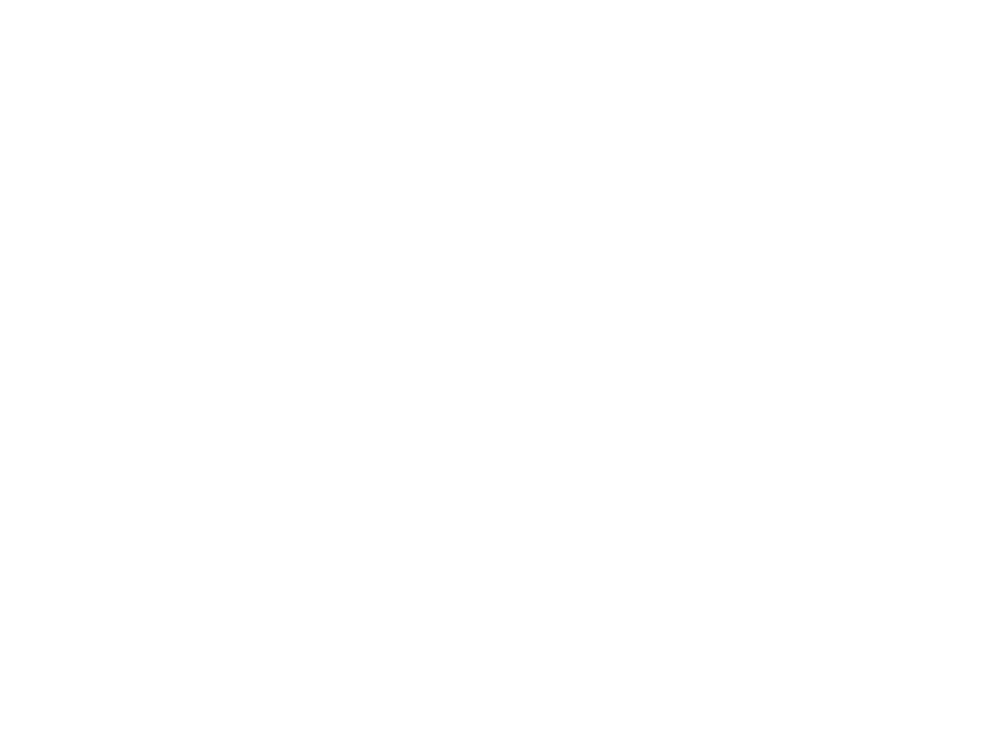

In [32]:
party_pcts.plot.bar()

In [33]:
#于是，通过该数据集就可以看出，聚会规模在周末会变大。
plt.close('all')

In [34]:
#对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。用seaborn来看每天的小费比例

In [35]:
import seaborn as sns

In [36]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [37]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


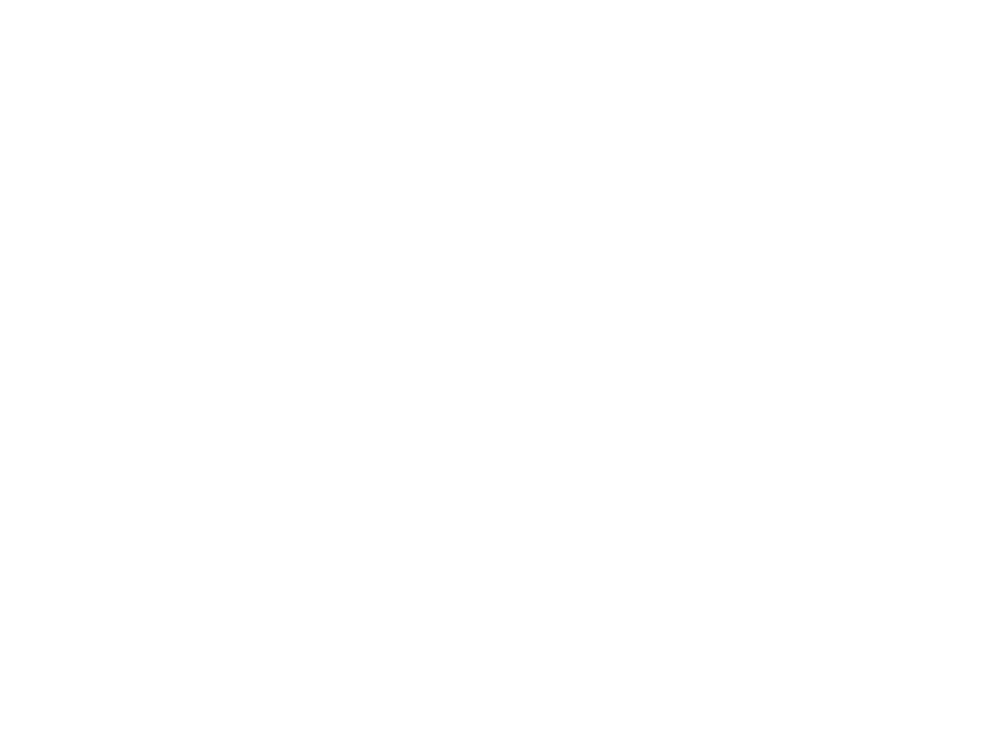

In [38]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [39]:
#seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

In [40]:
###seaborn.barplot有颜色选项，使我们能够通过一个额外的值设置
plt.close('all')

<IPython.core.display.Javascript object>


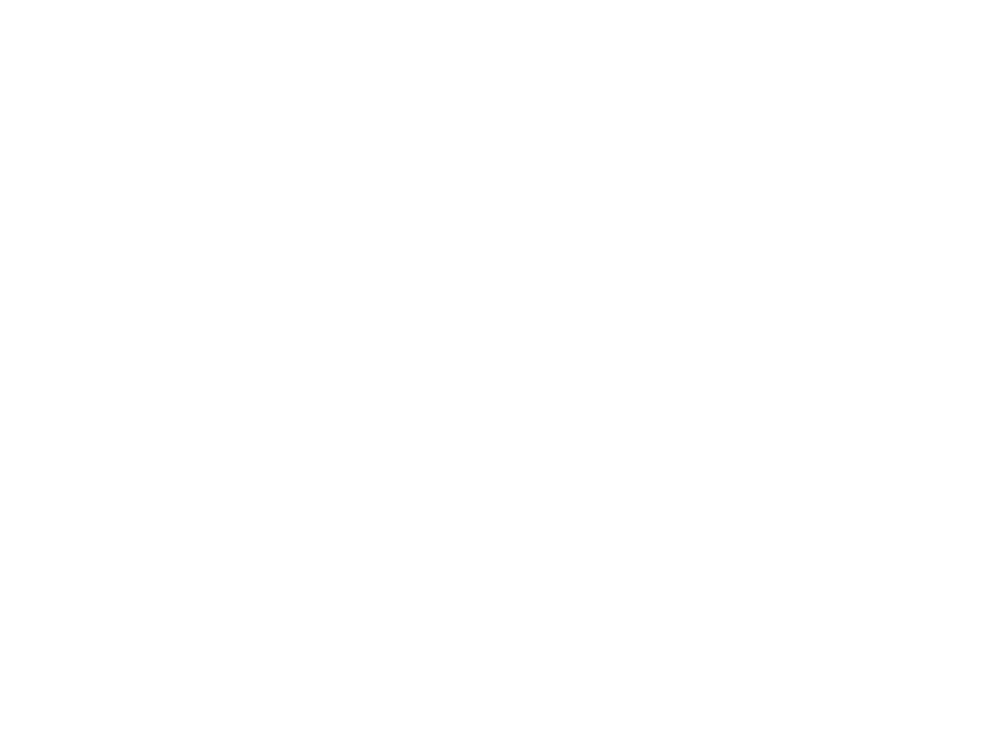

In [41]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [42]:
#注意，seaborn已经自动修改了图形的美观度：默认调色板，图形背景和网格线的颜色。你可以用seaborn.set在不同的图形外观之间切换

In [43]:
sns.set(style="whitegrid")

# 直方图和密度图

In [44]:
#直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个小费数据为例，通过在Series使用plot.hist方法，我们可以生成一张“小费占消费总额百分比”的直方图

<IPython.core.display.Javascript object>


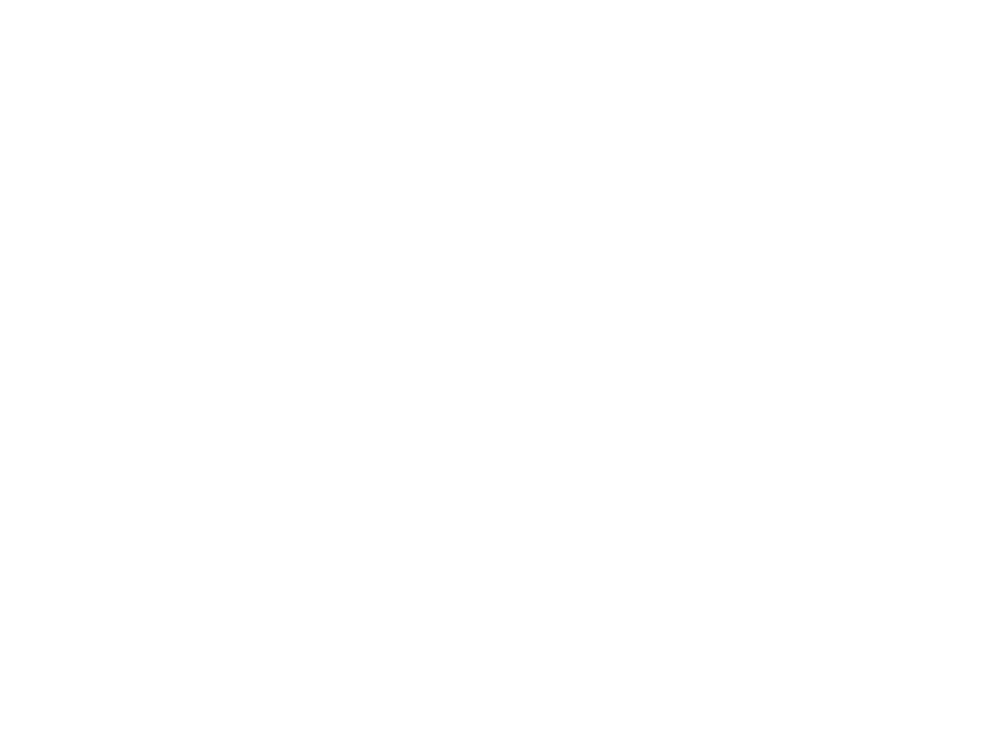

In [45]:
plt.close('all')
tips['tip_pct'].plot.hist(bins=50)
#分50组

In [46]:
#与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图

<IPython.core.display.Javascript object>


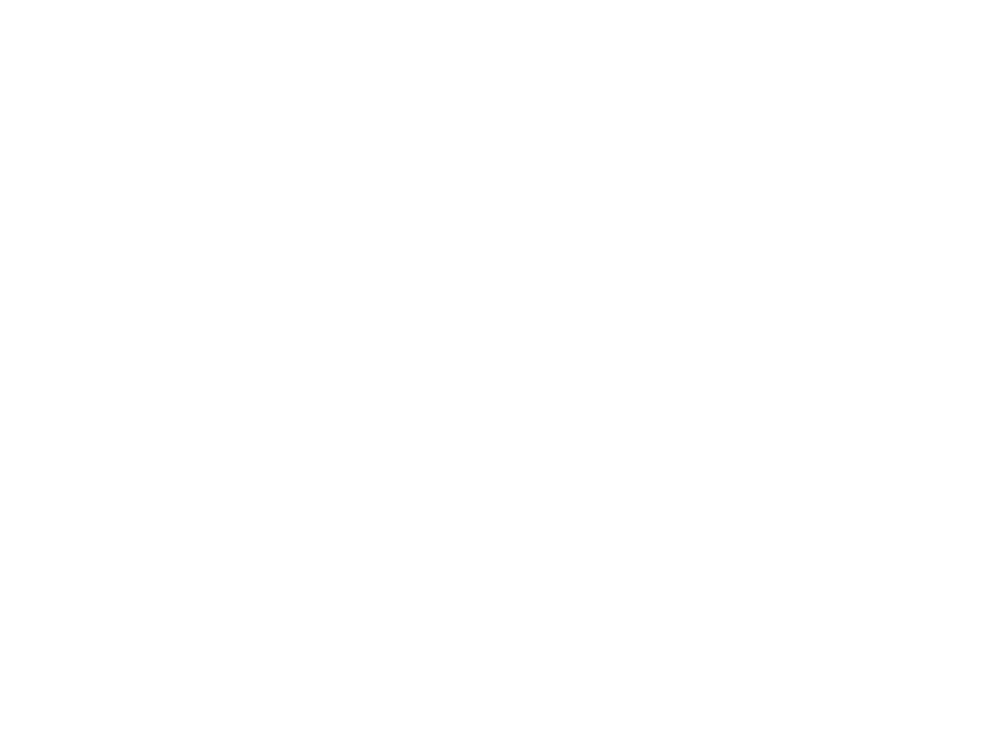

In [47]:
plt.close('all')
tips['tip_pct'].plot.density()

In [48]:
#seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


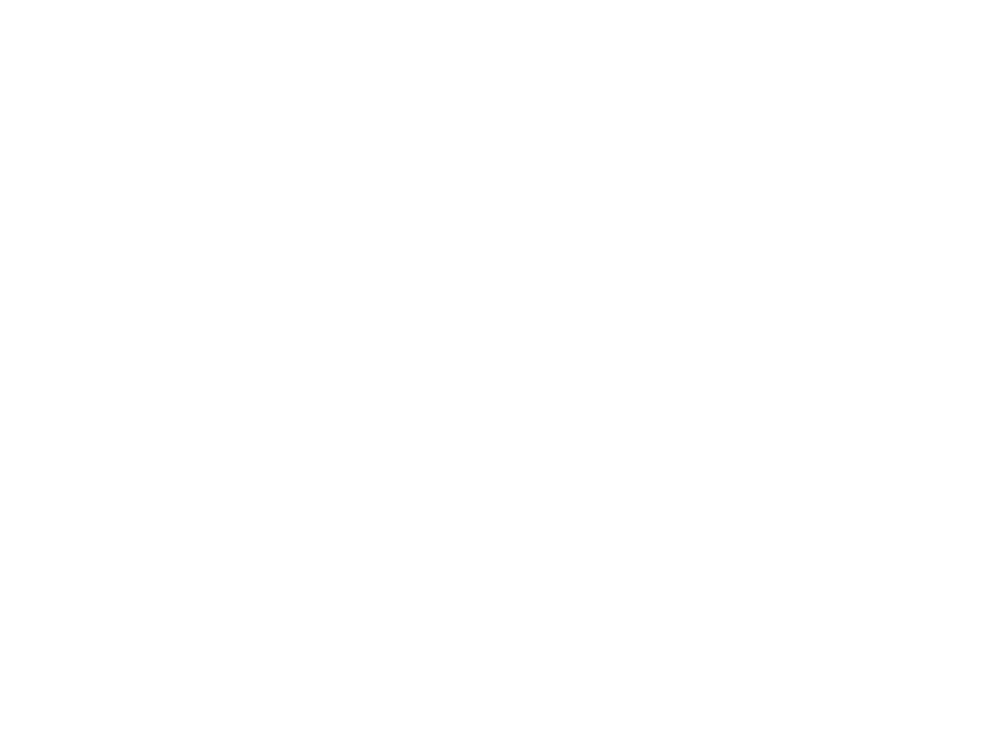

In [49]:
plt.close('all')
sns.distplot(values, bins=100, color='k')

# 散布图或点图

In [50]:
#点图或散布图是观察两个一维数据序列之间的关系的有效手段。在下面这个例子中，我加载了来自statsmodels项目的macrodata数据集，选择了几个变量，然后计算对数差：

In [51]:
macro = pd.read_csv('examples/macrodata.csv')

In [52]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [53]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [54]:
trans_data = np.log(data).diff().dropna()

In [55]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [56]:
#然后可以使用seaborn的regplot方法，它可以做一个散布图，并加上一条线性回归的线

<IPython.core.display.Javascript object>


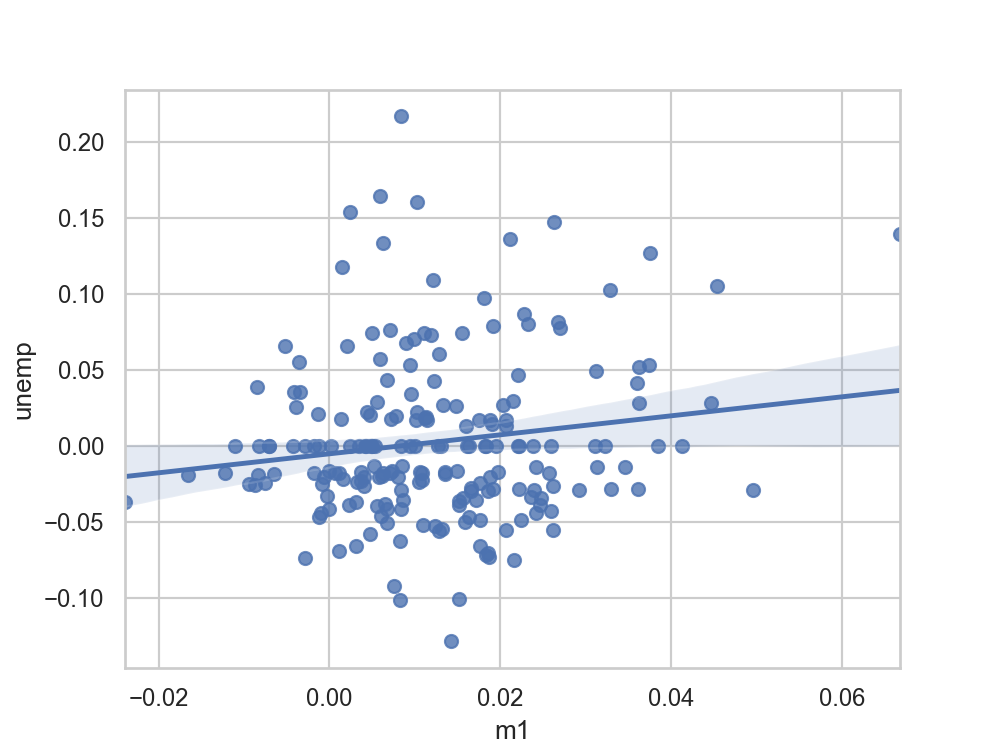

In [57]:
plt.close('all')
sns.regplot('m1', 'unemp', data=trans_data)

In [58]:
#在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计

<IPython.core.display.Javascript object>


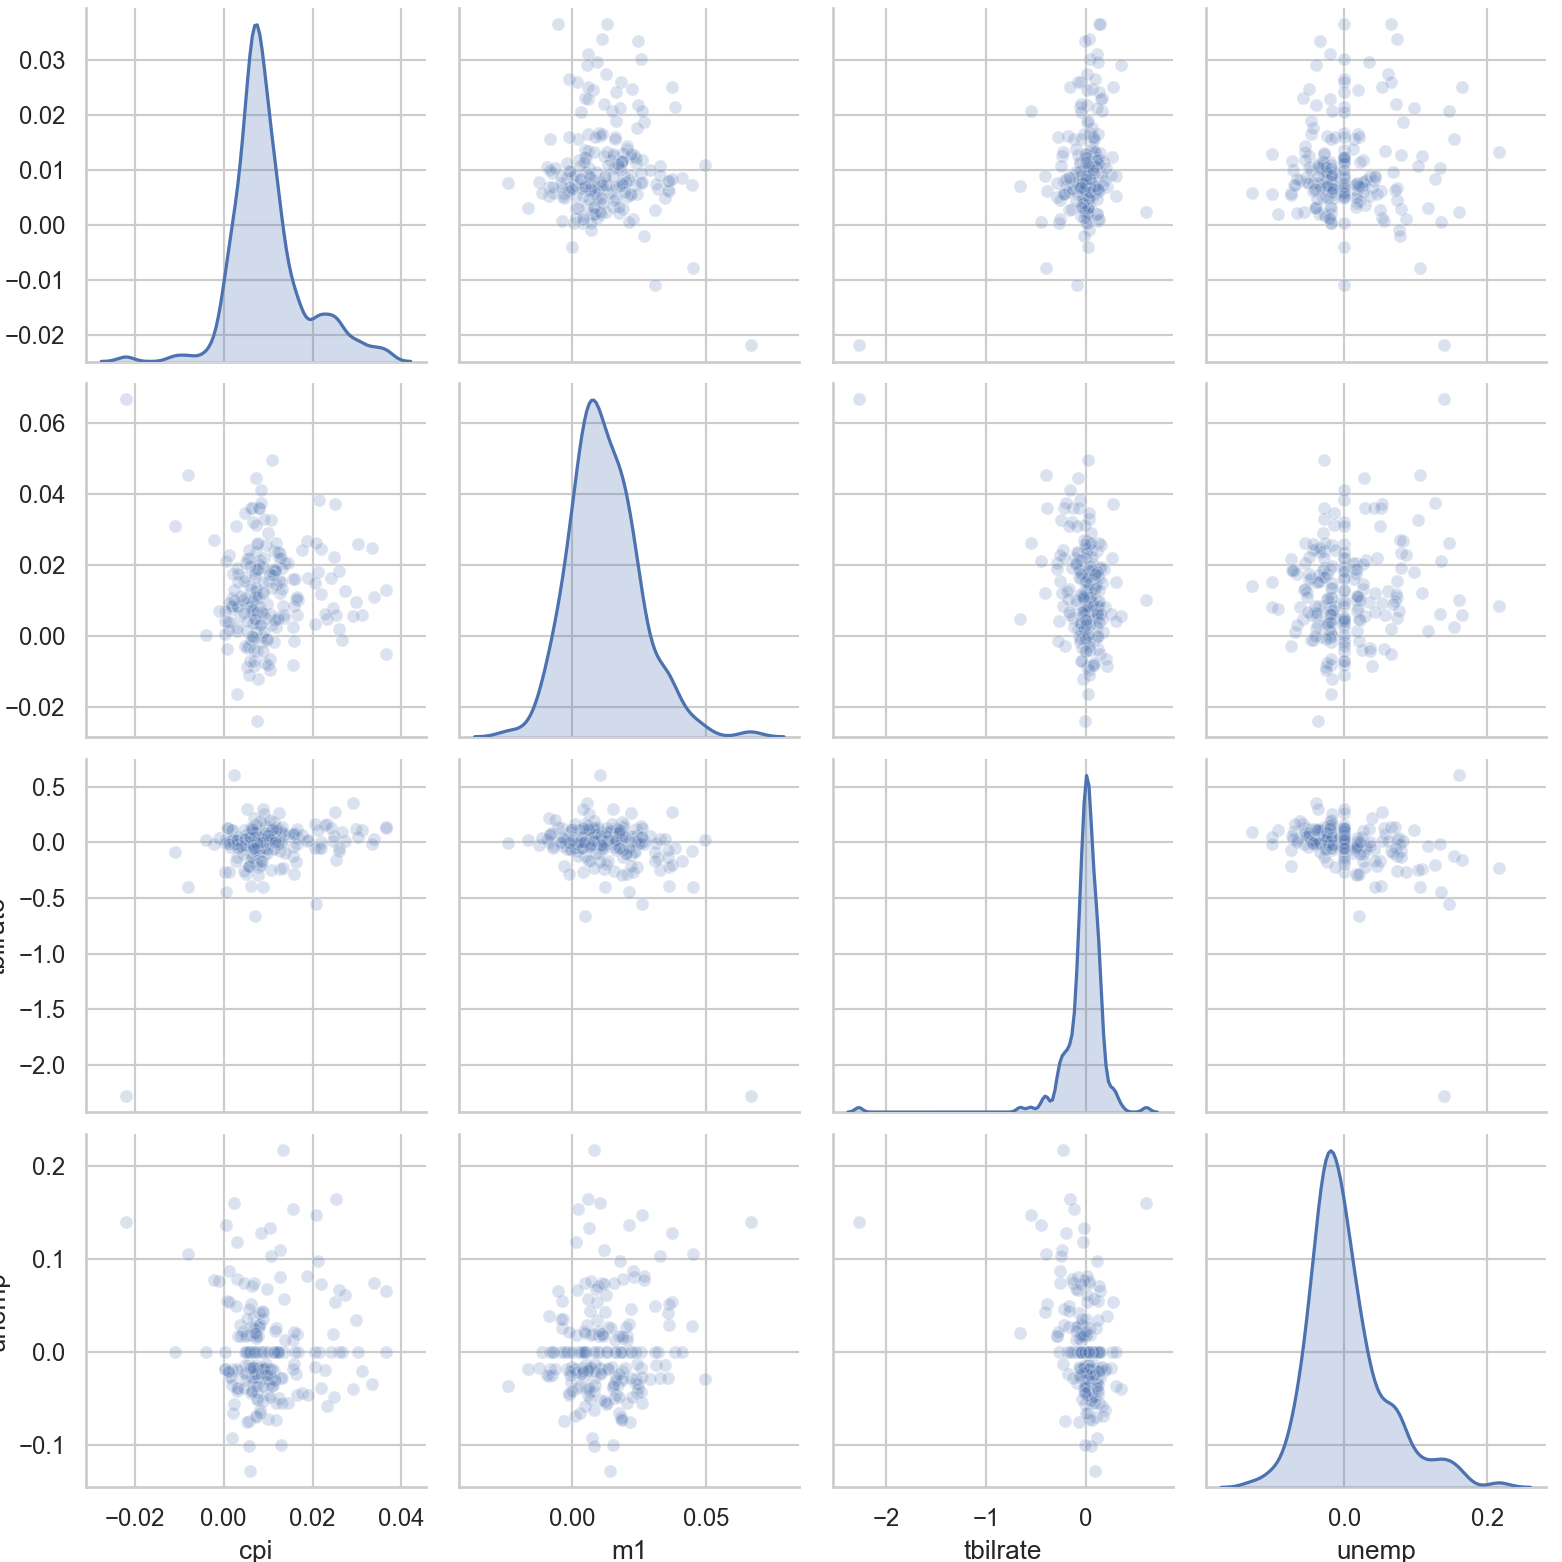

In [59]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})